In [54]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical  # Import to_categorical

# Preprocess Data

In [57]:
# Define a function to load the dataset
def load_dataset(data_dir):
    data = []  # To store images
    labels = []  # To store labels

    # Iterate through the subdirectories (assuming each subdirectory represents a class)
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)

        if os.path.isdir(class_dir):
            # Load images from this class directory
            for image_filename in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_filename)
                image = cv2.imread(image_path)  # Load image using OpenCV

                if image is not None:
                    # Resize the image to your desired input shape (e.g., 28x28)
                    image = cv2.resize(image, (28, 28))
                    data.append(image)
                    labels.append(class_name)

    # Convert data and labels to NumPy arrays
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

In [58]:
# Paths to training and testing data directories
train_dir = 'hebrew-data/TRAIN'  
test_dir = 'hebrew-data/TEST'    

In [65]:
# Load your dataset (replace with your dataset loading code)
train_data, train_labels = load_dataset(train_dir)  # Replace with your dataset loading code
test_data, test_labels = load_dataset(test_dir)  # Replace with your dataset loading code

# One-hot encode the labels
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Creating ImageDataGenerator instances for training and testing sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [69]:
# Generating batches of image data (and their labels) directly from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),  # Resize images
    batch_size=32,  # Batches of 32 images
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

Found 3965 images belonging to 28 classes.
Found 1134 images belonging to 27 classes.


In [70]:
# Retrieve mapping of class indices (numerical labels) to class names (folder names)
class_indices = train_generator.class_indices

# Creating reverse mapping to translate from numerical labels back to class names
index_to_class = {v: k for k, v in class_indices.items()}

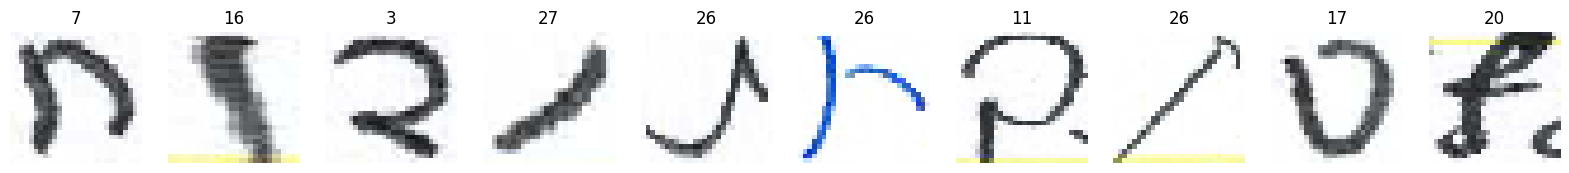

In [71]:
# Function to show images with corresponding class names
def show_images(images, labels):
    _, axs = plt.subplots(1, 10, figsize=(20, 2))  # Creating a grid of 10 subplots
    axs = axs.flatten()  # Flattening the array of axes for easy iteration
    for img, label, ax in zip(images, labels, axs):  # Iterating over images and labels
        ax.imshow(img)  # Displaying the image
        ax.axis('off')  # Turning off the axis
        class_name = index_to_class[np.argmax(label)]  # Getting the class name from the label
        ax.set_title(class_name)  # Setting the title of the subplot to the class name
    plt.show()  # Displaying the plot

# Load one batch of images and their labels from training generator
images, labels = next(train_generator)

# Display loaded images with their class names
show_images(images, labels)

# Define Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 3)))
model.add(Activation('relu'))
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 3D output to 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(64))
model.add(Activation('relu'))

# Dropout to reduce overfitting
model.add(Dropout(0.5))

# Output layer
# The number of neurons should be equal to the number of classes
num_classes = len(train_generator.class_indices)
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

# Train Model

In [73]:
# Define the number of epochs and batch size
num_epochs = 10  # You can adjust this number based on your needs
batch_size = 32  # You can adjust this batch size based on your memory capacity

# Train the model
history = model.fit(
    train_generator,  # Your training data generator
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=test_generator  # Your validation or test data generator
)

Epoch 1/10
124/124 [==============================] - ETA: 0s - loss: 3.1473 - accuracy: 0.1039

InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes

  File "C:\Users\akosi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code

  File "C:\Users\akosi\AppData\Local\Temp\ipykernel_4468\3761785021.py", line 6, in <module>

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1856, in fit

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1919, in test_step

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy

  File "C:\Users\akosi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,28] labels_size=[32,27]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_5832]